<a href="https://colab.research.google.com/github/AmitHasanShuvo/Machine-Learning-Projects/blob/master/Fashion_MNIST_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,models,layers

In [0]:
(training_images, training_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
training_images=training_images.reshape(60000, 28, 28, 1)
test_images=test_images.reshape(10000, 28, 28, 1)



In [0]:
training_images, test_images = training_images / 255.0, test_images / 255.0


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
#model.fit(training_images, training_labels, epochs=20)

history = model.fit(training_images, training_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2677 - accuracy: 0.8999 - val_loss: 0.3291 - val_accuracy: 0.8841
Epoch 2/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2631 - accuracy: 0.9009 - val_loss: 0.3315 - val_accuracy: 0.8837
Epoch 3/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2591 - accuracy: 0.9025 - val_loss: 0.3252 - val_accuracy: 0.8855
Epoch 4/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2549 - accuracy: 0.9051 - val_loss: 0.3343 - val_accuracy: 0.8794
Epoch 5/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2502 - accuracy: 0.9070 - val_loss: 0.3308 - val_accuracy: 0.8819
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2464 - accuracy: 0.9080 - val_loss: 0.3257 - val_accuracy: 0.8879
Epoch 7/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2430 - accuracy: 0.9099 - val_loss: 0.3213 -

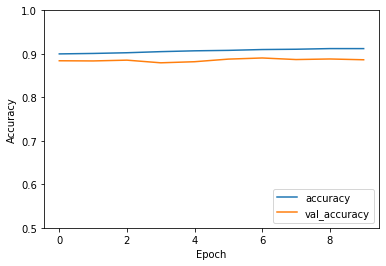

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Implementation with callbacks

In [1]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.998):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1419 - accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0515 - accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0311 - accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0213 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0133 - accuracy: 0.9961
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0101 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0078 - accuracy: 0.9974
Epoch 8/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0056 - accuracy: 0.9980
Reached 99.8% accuracy so cancelling training!
1875/1875 [==============================] - 31s 17ms/step - l

References: 
1. https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%203%20-%20Notebook.ipynb
2. https://github.com/lmoroney/dlaicourse/blob/master/Exercises/Exercise%203%20-%20Convolutions/Exercise%203%20-%20Answer.ipynb